In [1]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import statsmodels.api as sm
from scipy import stats

/Users/karlaruggaber/Desktop/HSG/Semester3/Statistik für Data Science/Projekt/Statistik-Datenbank/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")


In [5]:
# --- Grundwahrscheinlichkeiten ---
p_fraud = ds["is_fraud"].mean()
p_male  = (ds["gender"] == "M").mean()
p_female = (ds["gender"] == "F").mean()

# --- P(Male | Fraud) ---
p_male_given_fraud = ds.loc[ds["is_fraud"] == 1, "gender"].eq("M").mean()
p_female_given_fraud = ds.loc[ds["is_fraud"] == 1, "gender"].eq("F").mean()

# --- Bayes: P(Fraud | Male) und P(Fraud | Female) ---
p_fraud_given_male = (p_male_given_fraud * p_fraud) / p_male
p_fraud_given_female = (p_female_given_fraud * p_fraud) / p_female

print("Bayes-berechnete bedingte Wahrscheinlichkeiten:")
print(f"P(Fraud | Male)   = {p_fraud_given_male:.6f}")
print(f"P(Fraud | Female) = {p_fraud_given_female:.6f}")

# --- Risiko-Maß: Risk Ratio (Relatives Risiko) ---
risk_ratio = p_fraud_given_male / p_fraud_given_female
print(f"\nRisikomaß (Risk Ratio) Männer vs. Frauen: {risk_ratio:.3f}")

Bayes-berechnete bedingte Wahrscheinlichkeiten:
P(Fraud | Male)   = 0.006426
P(Fraud | Female) = 0.005262

Risikomaß (Risk Ratio) Männer vs. Frauen: 1.221


Risikomaße nach Kategorie:
                P(Fraud|Category)  Risk Difference  Risk Ratio  Odds Ratio
category                                                                  
shopping_net               0.0176           0.0118      3.0338      3.0701
misc_net                   0.0145           0.0087      2.4976      2.5196
grocery_pos                0.0141           0.0083      2.4354      2.4559
shopping_pos               0.0072           0.0014      1.2482      1.2500
gas_transport              0.0047          -0.0011      0.8109      0.8100
misc_pos                   0.0031          -0.0027      0.5422      0.5407
grocery_net                0.0029          -0.0028      0.5093      0.5078
travel                     0.0029          -0.0029      0.4947      0.4933
entertainment              0.0025          -0.0033      0.4281      0.4267
personal_care              0.0024          -0.0034      0.4188      0.4173
kids_pets                  0.0021          -0.0037      0.3653      0.363

/var/folders/d7/0j6dg7256ms0w8n1z48lk8hc0000gn/T/ipykernel_99460/1835662561.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


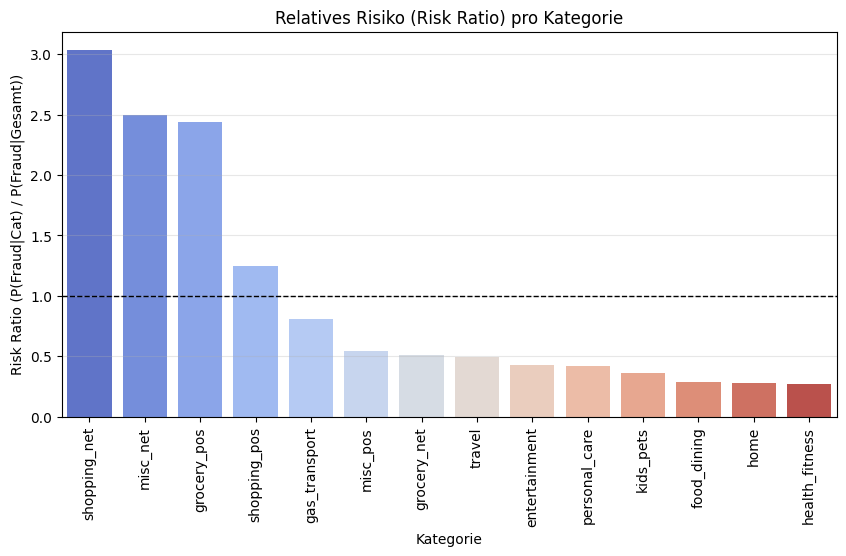

In [6]:
# --- Grundwahrscheinlichkeit ---
p_fraud_overall = ds["is_fraud"].mean()

# --- Betrugswahrscheinlichkeit pro Kategorie ---
fraud_by_cat = ds.groupby("category")["is_fraud"].mean().sort_values(ascending=False)

# --- Risikomaße berechnen ---
risk_df = pd.DataFrame({
    "P(Fraud|Category)": fraud_by_cat,
    "Risk Difference": fraud_by_cat - p_fraud_overall,
    "Risk Ratio": fraud_by_cat / p_fraud_overall,
    "Odds Ratio": (fraud_by_cat / (1 - fraud_by_cat)) / (p_fraud_overall / (1 - p_fraud_overall))
})

print("Risikomaße nach Kategorie:")
print(risk_df.round(4))

# --- Visualisierung: Relative Risiken (RR) ---
plt.figure(figsize=(10,5))
sns.barplot(
    x=risk_df.index,
    y="Risk Ratio",
    data=risk_df,
    palette="coolwarm"
)
plt.title("Relatives Risiko (Risk Ratio) pro Kategorie")
plt.xlabel("Kategorie")
plt.ylabel("Risk Ratio (P(Fraud|Cat) / P(Fraud|Gesamt))")
plt.xticks(rotation=90)
plt.axhline(1, color="black", linestyle="--", linewidth=1)
plt.grid(axis="y", alpha=0.3)
plt.show()

=== Risikomaße nach Beruf (Top 10) ===
                                P(Fraud|Job)  Risk Difference  Risk Ratio  \
job                                                                         
Personnel officer                        1.0         0.994211  172.751799   
Air traffic controller                   1.0         0.994211  172.751799   
Accountant, chartered                    1.0         0.994211  172.751799   
Ship broker                              1.0         0.994211  172.751799   
Solicitor                                1.0         0.994211  172.751799   
Careers adviser                          1.0         0.994211  172.751799   
Information officer                      1.0         0.994211  172.751799   
Armed forces technical officer           1.0         0.994211  172.751799   
Industrial buyer                         1.0         0.994211  172.751799   
Homeopath                                1.0         0.994211  172.751799   

                                Odds

/var/folders/d7/0j6dg7256ms0w8n1z48lk8hc0000gn/T/ipykernel_99460/3925468156.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


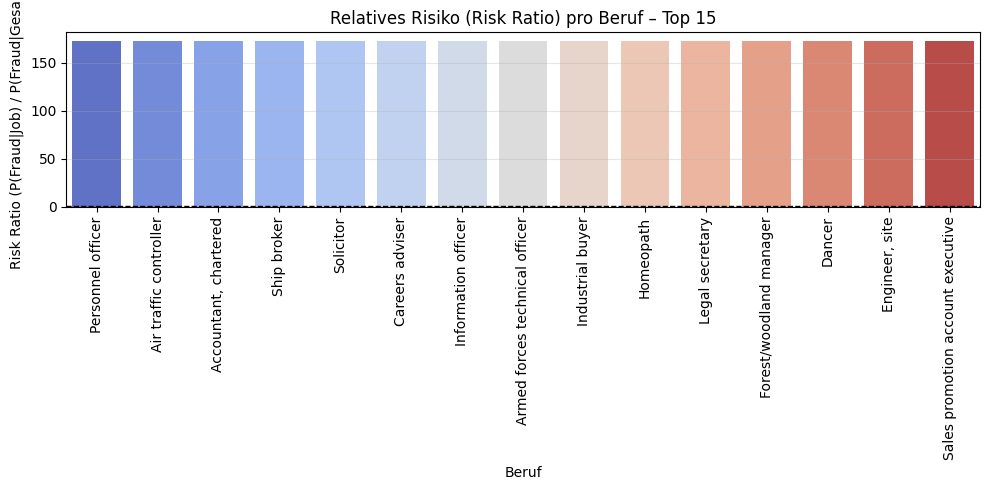

In [9]:
# === Grundwahrscheinlichkeit =============================================
p_fraud_overall = ds["is_fraud"].mean()

# === Betrugswahrscheinlichkeit pro Beruf =================================
fraud_by_job = ds.groupby("job")["is_fraud"].mean().sort_values(ascending=False)

# === Risikomaße berechnen ===============================================
risk_job = pd.DataFrame({
    "P(Fraud|Job)": fraud_by_job,
    "Risk Difference": fraud_by_job - p_fraud_overall,
    "Risk Ratio": fraud_by_job / p_fraud_overall,
    "Odds Ratio": (fraud_by_job / (1 - fraud_by_job)) / (p_fraud_overall / (1 - p_fraud_overall))
}).round(6)

print("=== Risikomaße nach Beruf (Top 10) ===")
print(risk_job.head(10))

# === Visualisierung: Top 15 Berufe nach Risk Ratio =======================
top_jobs = risk_job.head(15).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_jobs,
    x="job",
    y="Risk Ratio",
    palette="coolwarm",
    order=top_jobs.sort_values("Risk Ratio", ascending=False)["job"]
)
plt.title("Relatives Risiko (Risk Ratio) pro Beruf – Top 15")
plt.xlabel("Beruf")
plt.ylabel("Risk Ratio (P(Fraud|Job) / P(Fraud|Gesamt))")
plt.xticks(rotation=90)
plt.axhline(1, color="black", linestyle="--", linewidth=1)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()